# Import Libraries 

In [3]:
import sys
!{sys.executable} -m pip install pandas-profiling

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

import pandas_profiling
from pandas_profiling import ProfileReport

%matplotlib inline
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=12)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


# Exploratory Data Analytics 

In [7]:
df = pd.read_csv("202307-divvy-tripdata.csv",parse_dates=['started_at','ended_at'])
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.69,-87.70,41.69,-87.65,member
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.90,-87.69,41.89,-87.65,member
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.90,-87.69,41.91,-87.68,member
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.88,-87.66,41.88,-87.64,member
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.97,-87.67,41.96,-87.64,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767645,57F5743A5828DA62,electric_bike,2023-07-14 19:17:13,2023-07-14 19:26:31,NaN,NaN,California Ave & Division St,13256,41.91,-87.68,41.90,-87.70,member
767646,2FF218D4C8F0EF1C,electric_bike,2023-07-14 19:16:13,2023-07-14 19:16:16,NaN,NaN,NaN,NaN,41.91,-87.68,41.91,-87.68,member
767647,2661FBD1F5A1C76D,electric_bike,2023-07-15 13:34:00,2023-07-15 13:43:13,NaN,NaN,NaN,NaN,41.94,-87.65,41.93,-87.64,member
767648,9CF4B70C23E033B1,electric_bike,2023-07-06 20:52:09,2023-07-06 21:01:13,NaN,NaN,NaN,NaN,41.91,-87.63,41.93,-87.64,member


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767650 entries, 0 to 767649
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             767650 non-null  object        
 1   rideable_type       767650 non-null  object        
 2   started_at          767650 non-null  datetime64[ns]
 3   ended_at            767650 non-null  datetime64[ns]
 4   start_station_name  644707 non-null  object        
 5   start_station_id    644707 non-null  object        
 6   end_station_name    637346 non-null  object        
 7   end_station_id      637346 non-null  object        
 8   start_lat           767650 non-null  float64       
 9   start_lng           767650 non-null  float64       
 10  end_lat             766396 non-null  float64       
 11  end_lng             766396 non-null  float64       
 12  member_casual       767650 non-null  object        
dtypes: datetime64[ns](2), float64

In [9]:
df.describe(include='all')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
count,767650,767650,767650,767650,644707,644707,637346,637346,767650.00,767650.00,766396.00,766396.00,767650
unique,767650,3,617777,619777,1253,1223,1250,1221,NaN,NaN,NaN,NaN,2
top,9340B064F0AEE130,electric_bike,2023-07-13 17:38:08,2023-07-13 07:30:44,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,NaN,NaN,NaN,NaN,member
freq,1,387096,8,10,11981,11981,12053,12053,NaN,NaN,NaN,NaN,436292
first,NaN,NaN,2023-07-01 00:00:00,2023-07-01 00:01:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2023-07-31 23:59:56,2023-08-12 04:53:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.91,-87.65,41.91,-87.65,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,0.03,0.04,0.03,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.65,-87.92,41.61,-87.92,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.88,-87.66,41.88,-87.66,NaN


In [13]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', 'time_diff'], dtype='object')

In [14]:
df["time_diff"] = df['ended_at'] - df['started_at']

In [15]:
df["time_diff"] = df["time_diff"]/np.timedelta64(1,'m') # converts time_diff in minutes

In [16]:
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_diff
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.69,-87.70,41.69,-87.65,member,16.50
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.90,-87.69,41.89,-87.65,member,13.50
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.90,-87.69,41.91,-87.68,member,9.60
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.88,-87.66,41.88,-87.64,member,4.93
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.97,-87.67,41.96,-87.64,member,11.43
5,9AEE973E6B941A9C,classic_bike,2023-07-10 08:44:47,2023-07-10 08:49:41,Racine Ave & Randolph St,13155,Sangamon St & Lake St,TA1306000015,41.88,-87.66,41.89,-87.65,member,4.90
6,E366E997FDA1582B,classic_bike,2023-07-25 14:30:44,2023-07-25 14:37:45,Clark St & Leland Ave,TA1309000014,Sheridan Rd & Montrose Ave,TA1307000107,41.97,-87.67,41.96,-87.65,member,7.02
7,1BB3E73851E6C2C1,classic_bike,2023-07-07 10:11:53,2023-07-07 10:17:55,Clark St & Leland Ave,TA1309000014,Ravenswood Ave & Berteau Ave,TA1309000018,41.97,-87.67,41.96,-87.67,member,6.03
8,DA1E1D0866E6566E,electric_bike,2023-07-04 21:57:27,2023-07-04 22:08:27,Clark St & Leland Ave,TA1309000014,Sheffield Ave & Wellington Ave,TA1307000052,41.97,-87.67,41.94,-87.65,member,11.00
9,39BF4A73A704CA85,classic_bike,2023-07-29 10:51:17,2023-07-29 11:03:13,Warren Park East,RP-002,Sheridan Rd & Loyola Ave,RP-009,42.00,-87.68,42.00,-87.66,member,11.93


In [17]:
df["weekday"] = df["started_at"].dt.weekday

In [18]:
df.head(10)  #returns weekday as integer Mon = 0 to Sun = 6

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,time_diff,weekday
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.69,-87.70,41.69,-87.65,member,16.50,6
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.90,-87.69,41.89,-87.65,member,13.50,6
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.90,-87.69,41.91,-87.68,member,9.60,6
3,9624A293749EF703,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.88,-87.66,41.88,-87.64,member,4.93,4
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.97,-87.67,41.96,-87.64,member,11.43,5
5,9AEE973E6B941A9C,classic_bike,2023-07-10 08:44:47,2023-07-10 08:49:41,Racine Ave & Randolph St,13155,Sangamon St & Lake St,TA1306000015,41.88,-87.66,41.89,-87.65,member,4.90,0
6,E366E997FDA1582B,classic_bike,2023-07-25 14:30:44,2023-07-25 14:37:45,Clark St & Leland Ave,TA1309000014,Sheridan Rd & Montrose Ave,TA1307000107,41.97,-87.67,41.96,-87.65,member,7.02,1
7,1BB3E73851E6C2C1,classic_bike,2023-07-07 10:11:53,2023-07-07 10:17:55,Clark St & Leland Ave,TA1309000014,Ravenswood Ave & Berteau Ave,TA1309000018,41.97,-87.67,41.96,-87.67,member,6.03,4
8,DA1E1D0866E6566E,electric_bike,2023-07-04 21:57:27,2023-07-04 22:08:27,Clark St & Leland Ave,TA1309000014,Sheffield Ave & Wellington Ave,TA1307000052,41.97,-87.67,41.94,-87.65,member,11.00,1
9,39BF4A73A704CA85,classic_bike,2023-07-29 10:51:17,2023-07-29 11:03:13,Warren Park East,RP-002,Sheridan Rd & Loyola Ave,RP-009,42.00,-87.68,42.00,-87.66,member,11.93,5


In [19]:
df.to_csv("bike.csv", index=False) # saving updated data file as new CSV

In [20]:
df.groupby("start_station_name")["ride_id"].count().sort_values()

start_station_name
Lavergne Ave & Division St                        1
Public Rack - Laflin St & 51st St                 1
Public Rack - Kostner Ave & Wrightwood Ave        1
Public Rack - S. Kilpatrick and W. 79th           1
Public Rack - Sacramento & 71st                   1
                                              ...  
Theater on the Lake                            6198
Michigan Ave & Oak St                          7170
DuSable Lake Shore Dr & Monroe St              7272
DuSable Lake Shore Dr & North Blvd             7581
Streeter Dr & Grand Ave                       11981
Name: ride_id, Length: 1253, dtype: int64

In [21]:
df.groupby("end_station_name")["ride_id"].count().sort_values()

end_station_name
Public Rack - Kostner & Peterson              1
Public Rack - Neenah & Dakin                  1
Public Rack - Albany Ave & 63rd St            1
Public Rack - Mulligan & Northwest Hwy        1
Public Rack - Mobile Ave & Archer Ave         1
                                          ...  
Theater on the Lake                        6260
DuSable Lake Shore Dr & Monroe St          7069
Michigan Ave & Oak St                      7186
DuSable Lake Shore Dr & North Blvd         8374
Streeter Dr & Grand Ave                   12053
Name: ride_id, Length: 1250, dtype: int64

In [22]:
df.groupby("rideable_type")["ride_id"].count().sort_values()

rideable_type
docked_bike       18424
classic_bike     362130
electric_bike    387096
Name: ride_id, dtype: int64

In [23]:
df.groupby("member_casual")["ride_id"].count().sort_values()

member_casual
casual    331358
member    436292
Name: ride_id, dtype: int64

In [24]:
df.groupby("start_station_name")["time_diff"].mean().sort_values()

start_station_name
Public Rack - King Dr & Oakwood Blvd                0.48
Public Rack - Kedzie Ave & 64th St - SE             1.22
Public Rack - Brooks Park                           1.43
Public Rack - 10557 S Western Ave                   2.30
Public Rack - Panama Ave & Forest Preserve Ave      2.40
                                                   ...  
MLK Jr Dr & 47th St                               606.18
Altgeld Gardens                                   798.30
Kedzie Ave & Harrison St                         1109.05
Western Ave & 104th St                           1137.95
Avenue O & 134th St                              2997.93
Name: time_diff, Length: 1253, dtype: float64

In [25]:
df.groupby("rideable_type")["time_diff"].mean().sort_values()

rideable_type
electric_bike    13.82
classic_bike     21.82
docked_bike     186.42
Name: time_diff, dtype: float64

In [26]:
df.groupby("member_casual")["time_diff"].mean().sort_values()

member_casual
member   13.69
casual   32.33
Name: time_diff, dtype: float64

# Panda Profiling

In [27]:
profile = ProfileReport(df=df, title='Bike Report', minimal=True)

In [28]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
profile.to_file("bike_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
df.drop(['ride_id','start_station_id','end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng'],axis=1,inplace=True)

In [32]:
df.head(10)

,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,time_diff,weekday
0,electric_bike,2023-07-23 20:06:14,2023-07-23 20:22:44,Kedzie Ave & 110th St,Public Rack - Racine Ave & 109th Pl,member,16.50,6
1,classic_bike,2023-07-23 17:05:07,2023-07-23 17:18:37,Western Ave & Walton St,Milwaukee Ave & Grand Ave,member,13.50,6
2,classic_bike,2023-07-23 10:14:53,2023-07-23 10:24:29,Western Ave & Walton St,Damen Ave & Pierce Ave,member,9.60,6
3,electric_bike,2023-07-21 08:27:44,2023-07-21 08:32:40,Racine Ave & Randolph St,Clinton St & Madison St,member,4.93,4
4,classic_bike,2023-07-08 15:46:42,2023-07-08 15:58:08,Clark St & Leland Ave,Montrose Harbor,member,11.43,5
5,classic_bike,2023-07-10 08:44:47,2023-07-10 08:49:41,Racine Ave & Randolph St,Sangamon St & Lake St,member,4.90,0
6,classic_bike,2023-07-25 14:30:44,2023-07-25 14:37:45,Clark St & Leland Ave,Sheridan Rd & Montrose Ave,member,7.02,1
7,classic_bike,2023-07-07 10:11:53,2023-07-07 10:17:55,Clark St & Leland Ave,Ravenswood Ave & Berteau Ave,member,6.03,4
8,electric_bike,2023-07-04 21:57:27,2023-07-04 22:08:27,Clark St & Leland Ave,Sheffield Ave & Wellington Ave,member,11.00,1
9,classic_bike,2023-07-29 10:51:17,2023-07-29 11:03:13,Warren Park East,Sheridan Rd & Loyola Ave,member,11.93,5


# Treating Missing Values

In [33]:
df.isnull().sum()

rideable_type              0
started_at                 0
ended_at                   0
start_station_name    122943
end_station_name      130304
member_casual              0
time_diff                  0
weekday                    0
dtype: int64

In [34]:
df['start_station_name'] = df['start_station_name'].replace(np.nan,"Missing")

In [35]:
df['end_station_name'] = df['end_station_name'].replace(np.nan,"Missing")

In [36]:
df.isnull().sum()

rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
member_casual         0
time_diff             0
weekday               0
dtype: int64

In [37]:
df.describe()

,time_diff,weekday
count,767650.00,767650.00
mean,21.74,3.10
std,208.68,2.07
min,-4.45,0.00
25%,6.17,1.00
50%,10.95,3.00
75%,19.45,5.00
max,51461.40,6.00


# Data Visualization

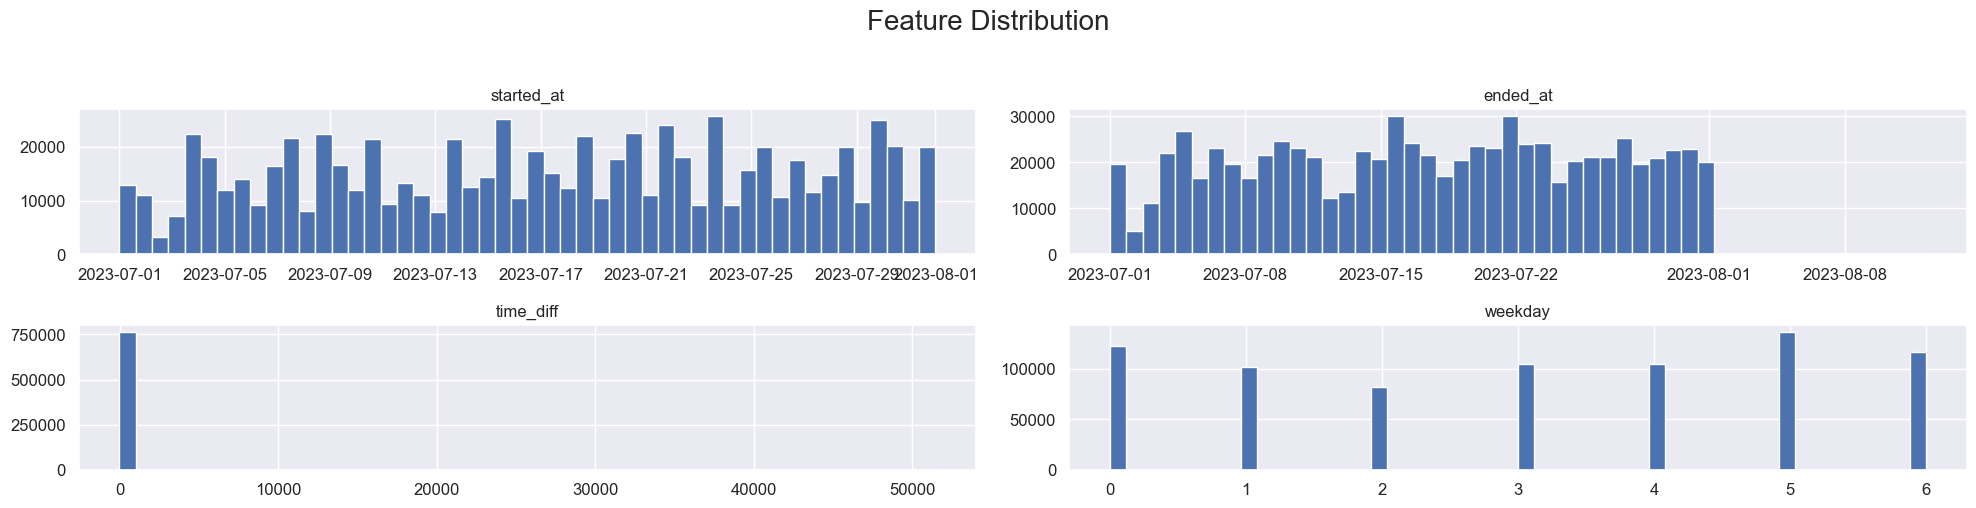

In [38]:
df.hist(bins=50, figsize=(20,5))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

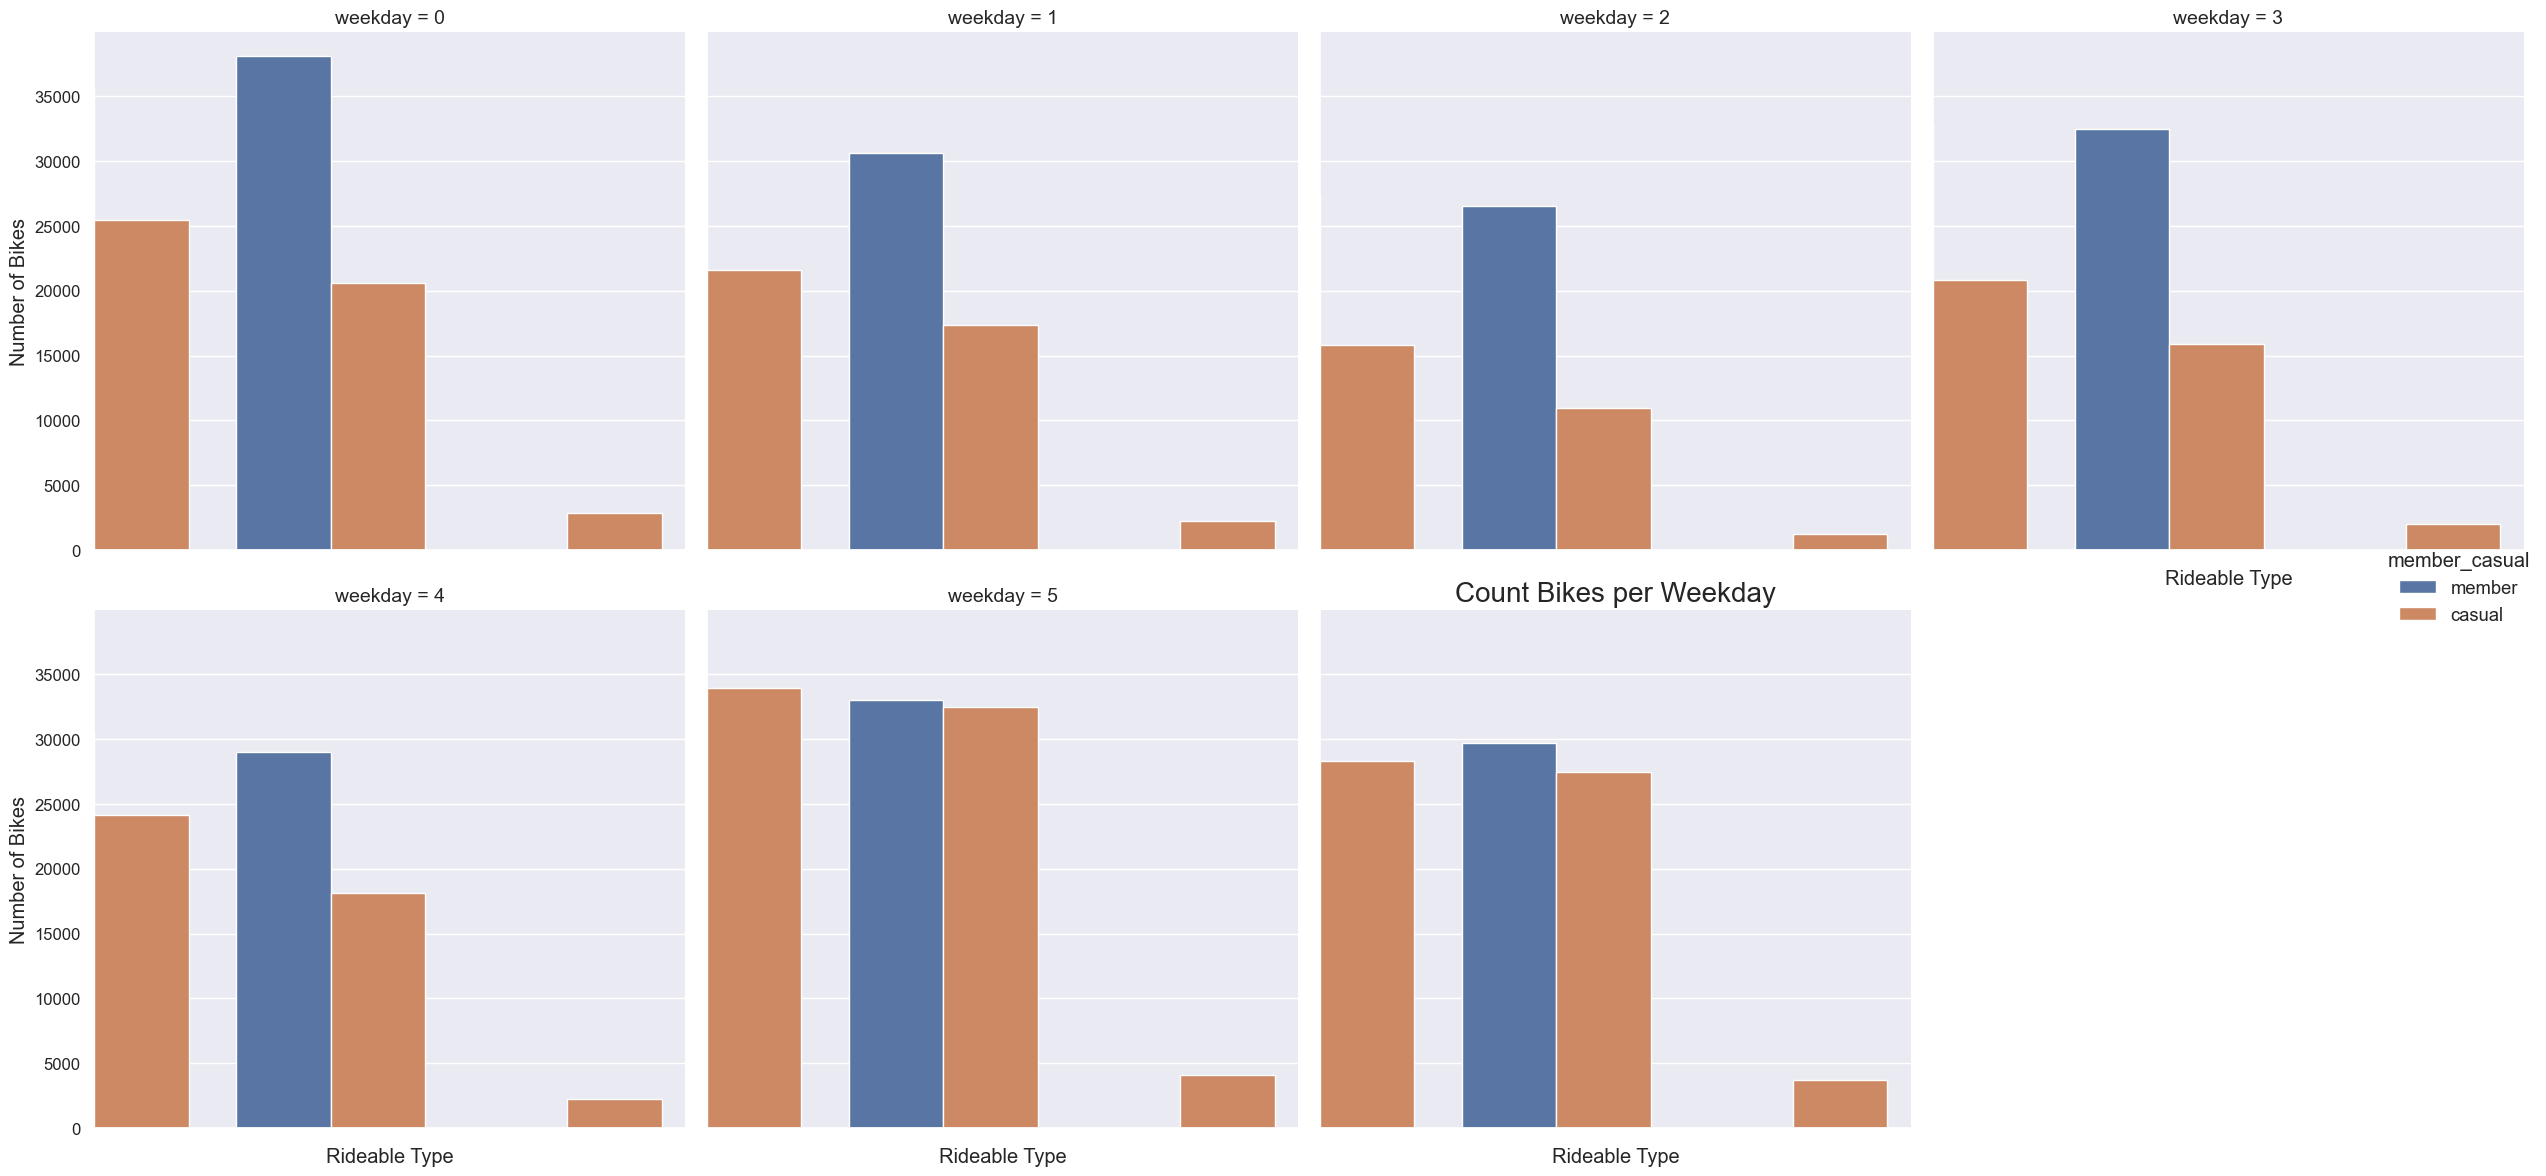

In [39]:
plt.figure(figsize=(20,20))


g = sns.catplot(x='rideable_type', hue='member_casual', col = 'weekday', col_wrap=4,
            kind='count', data=df,
            height = 6, aspect = 1)

g.set_xlabels("Rideable Type")
g.set_ylabels("Number of Bikes")
plt.title("Count Bikes per Weekday", size=20)
#g = (g.set_axis_labels("Tip","Total bill(USD)").set(xlim=(0,10),ylim=(0,100)


g.set(xlim=(0,None))
g.set_xticklabels(rotation=90)
plt.tight_layout()
plt.show()

# Time Series Analysis

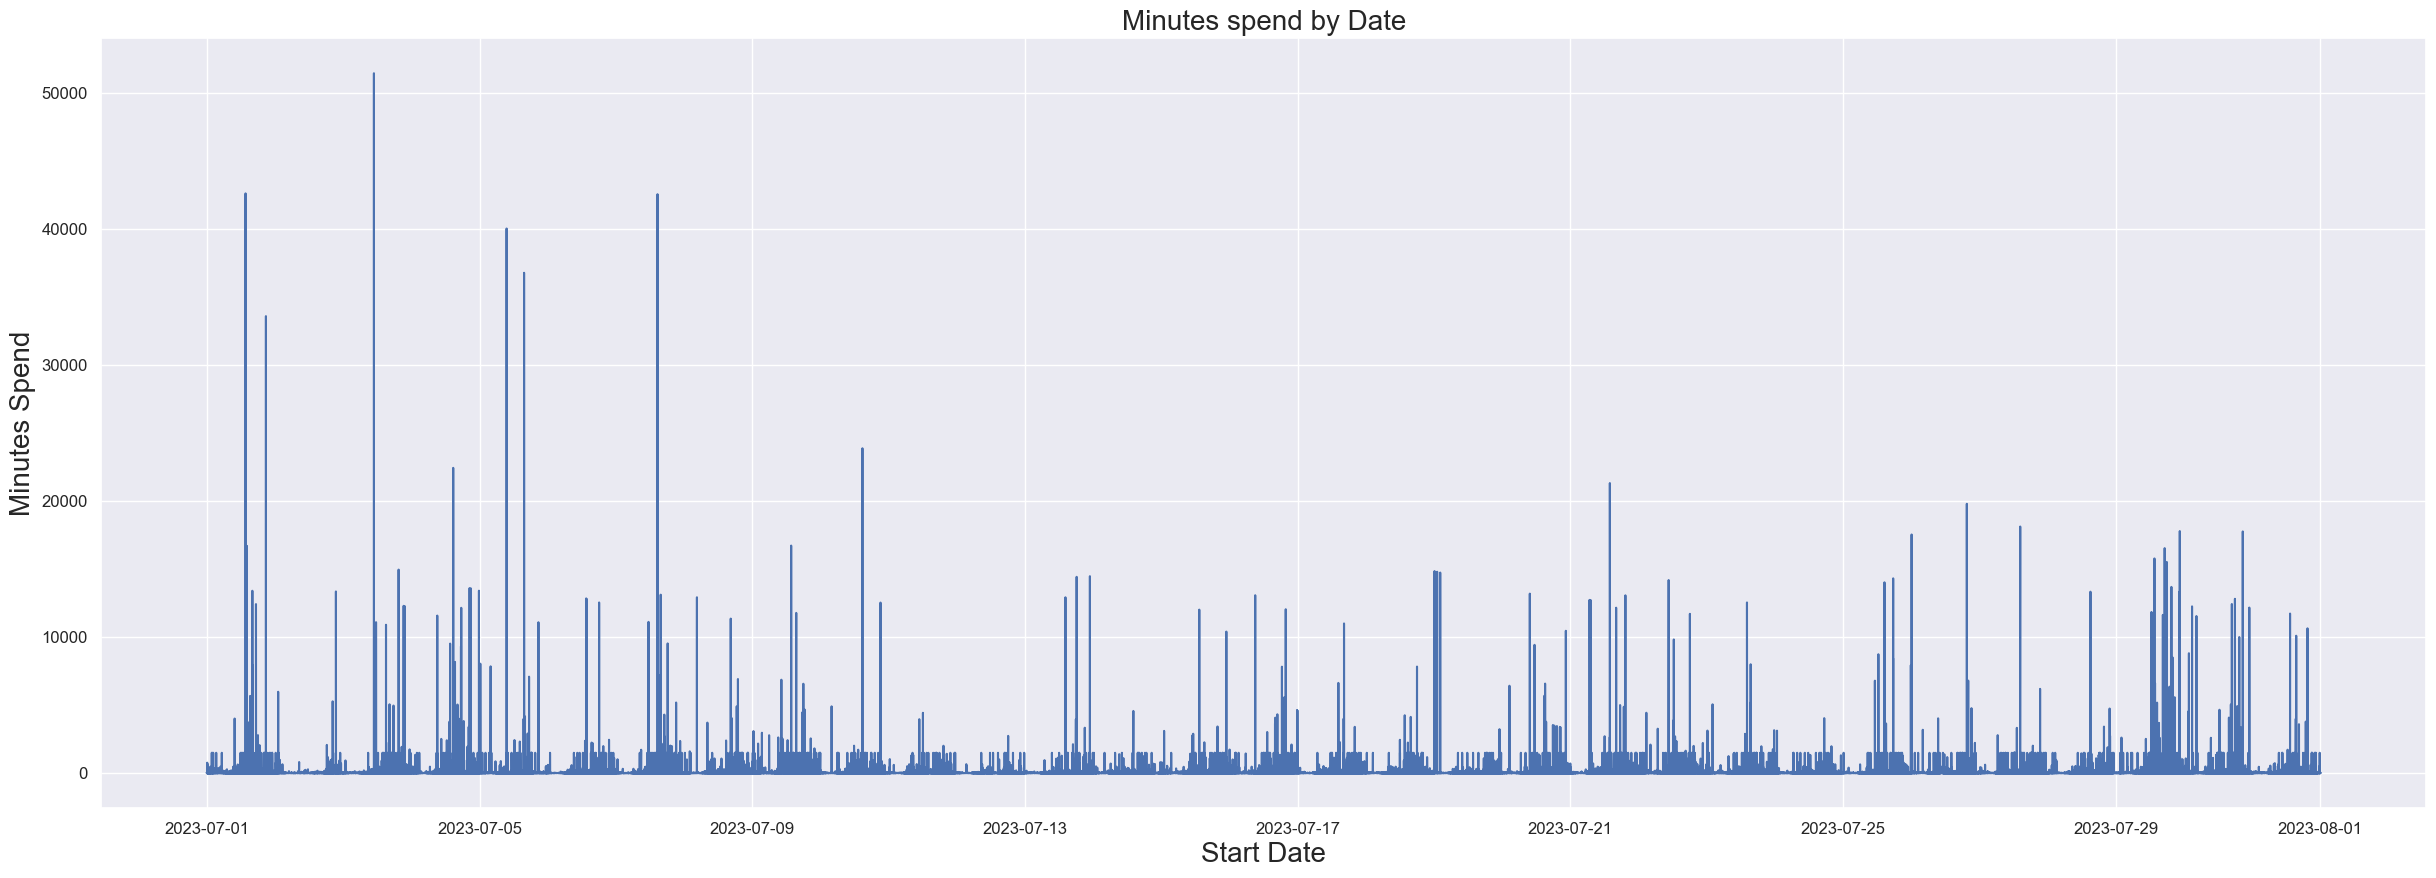

In [40]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.started_at,y=df.time_diff,data=df, estimator=None)
plt.title("Minutes spend by Date", fontsize=20)
plt.xlabel("Start Date", fontsize=20)
plt.ylabel("Minutes Spend", fontsize=20)
plt.show()

# Correlation 

In [41]:
df.corr()

,time_diff,weekday
time_diff,1.00,0.01
weekday,0.01,1.00


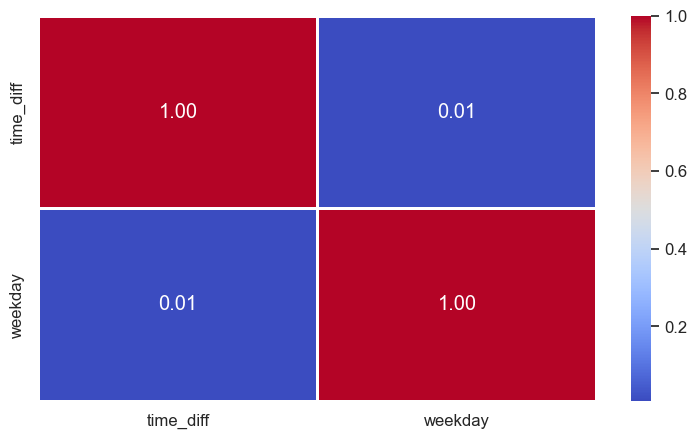

In [42]:
plt.figure(figsize=(9,5))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("", fontsize=20)
plt.show()